In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



In [4]:
# Load dataset (assume it will be uploaded later)
file_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)



In [5]:
# Convert TotalCharges to numeric and drop rows with missing TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)



In [6]:
# Drop customerID as it's not useful
df.drop('customerID', axis=1, inplace=True)



In [7]:
# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})



In [8]:
# Identify numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Tenure')

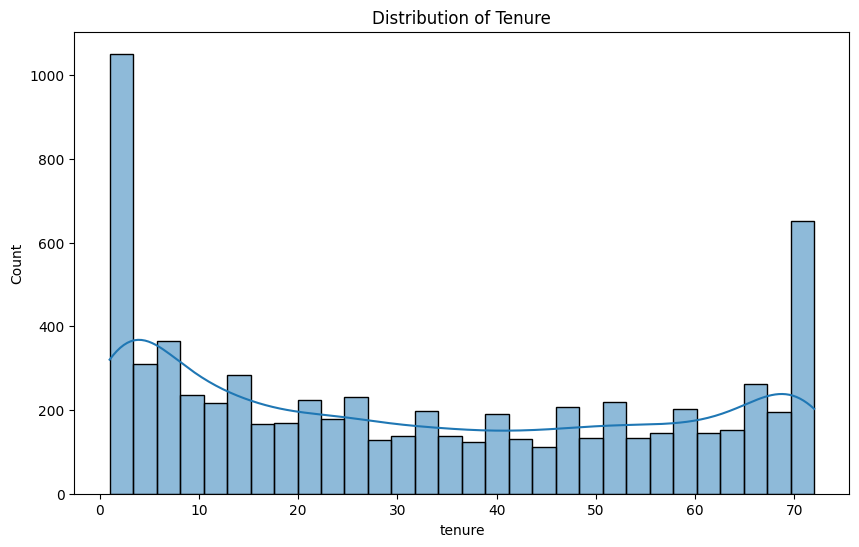

In [9]:
# ---------------------- Day 1: Dataset Exploration ----------------------
exploration_fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['tenure'], bins=30, kde=True, ax=ax)
ax.set_title('Distribution of Tenure')



Text(0.5, 1.0, 'Missing Values Heatmap')

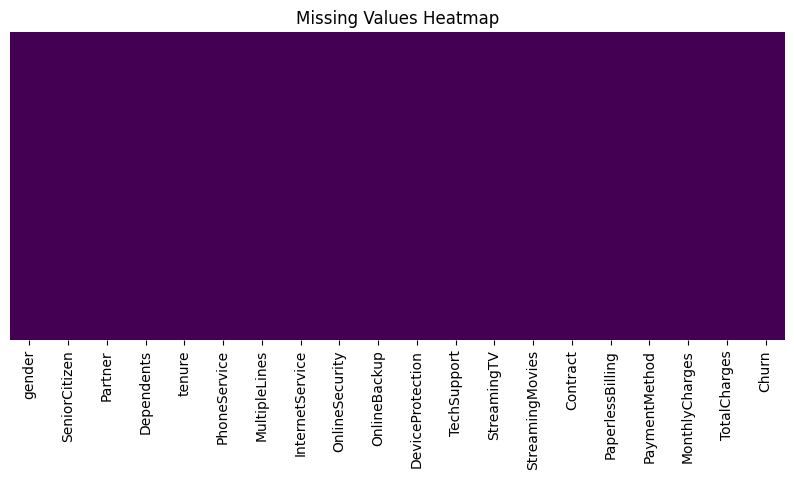

In [10]:
# ---------------------- Day 2: Handling Missing Values ----------------------
# Checking for missing values
missing_fig, ax = plt.subplots(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis', ax=ax)
ax.set_title('Missing Values Heatmap')



In [11]:
# ---------------------- Day 3: Handling Duplicates ----------------------
# (no specific visualization needed, assuming few to none)



Text(0.5, 1.0, 'Boxplot of Numerical Features')

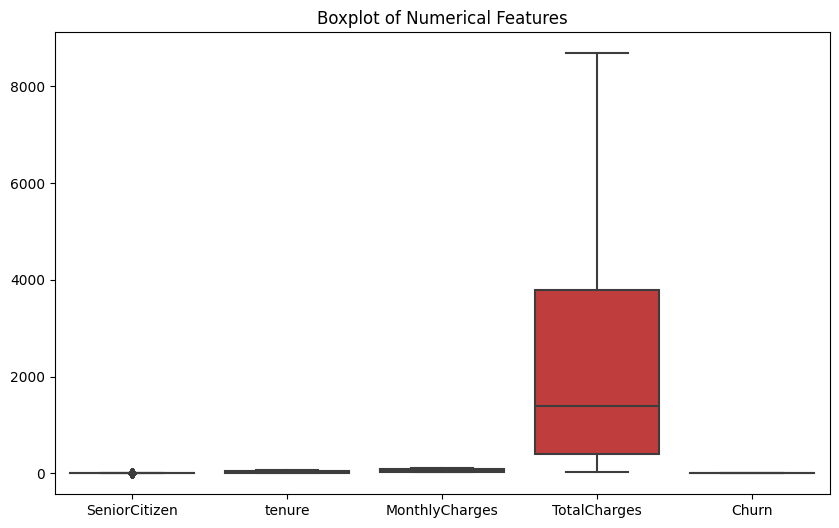

In [12]:
# ---------------------- Day 4: Handling Outliers (IQR) ----------------------
iqr_fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df[num_cols], ax=ax)
ax.set_title('Boxplot of Numerical Features')



Text(0.5, 1.0, 'Z-Score Based Outlier Detection')

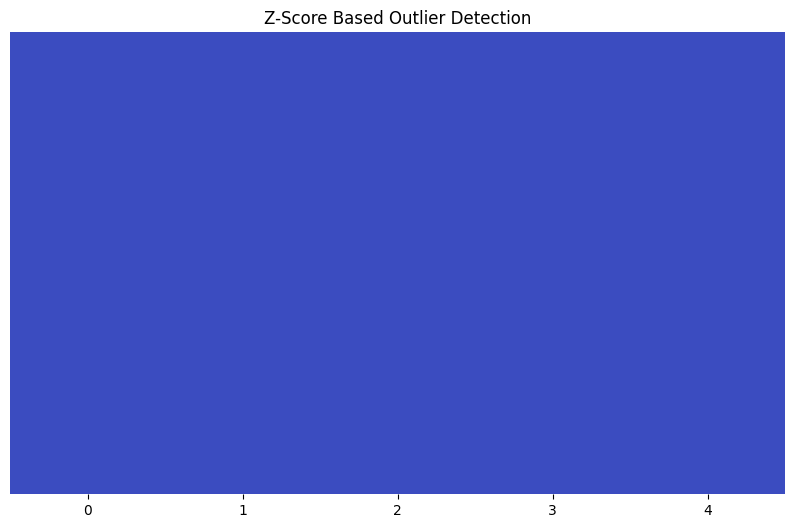

In [13]:
# ---------------------- Day 5: Z-Score Outlier Detection ----------------------
from scipy.stats import zscore
z_scores = np.abs(zscore(df[num_cols]))
outliers = (z_scores > 3)
zscore_fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(outliers, cbar=False, yticklabels=False, cmap='coolwarm', ax=ax)
ax.set_title('Z-Score Based Outlier Detection')



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'After Log Transformation - MonthlyCharges')

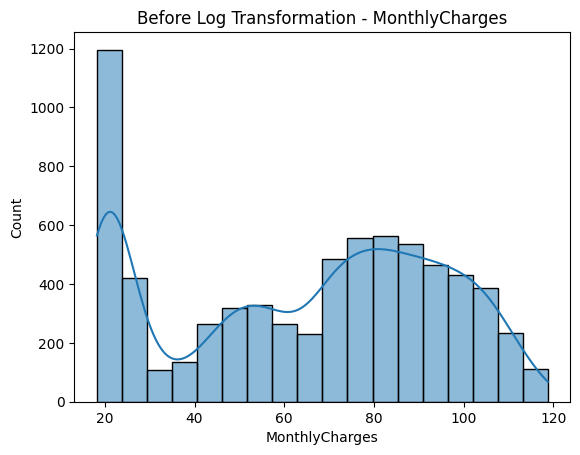

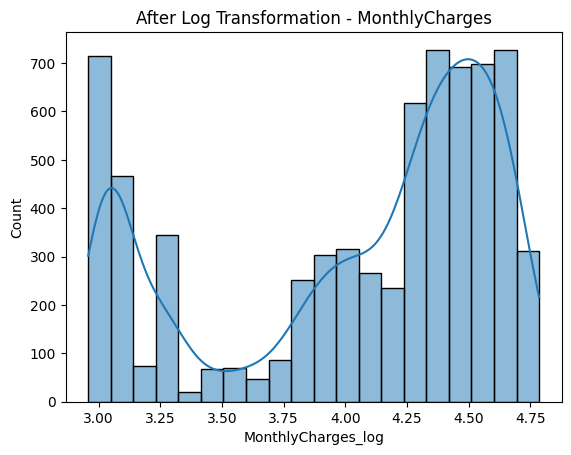

In [14]:
# ---------------------- Day 6: Skewness Treatment ----------------------
skewed_col = 'MonthlyCharges'
before_skew_fig, ax1 = plt.subplots()
sns.histplot(df[skewed_col], kde=True, ax=ax1)
ax1.set_title('Before Log Transformation - MonthlyCharges')

df['MonthlyCharges_log'] = np.log1p(df['MonthlyCharges'])

after_skew_fig, ax2 = plt.subplots()
sns.histplot(df['MonthlyCharges_log'], kde=True, ax=ax2)
ax2.set_title('After Log Transformation - MonthlyCharges')



Text(0.5, 1.0, 'Class Imbalance in Churn')

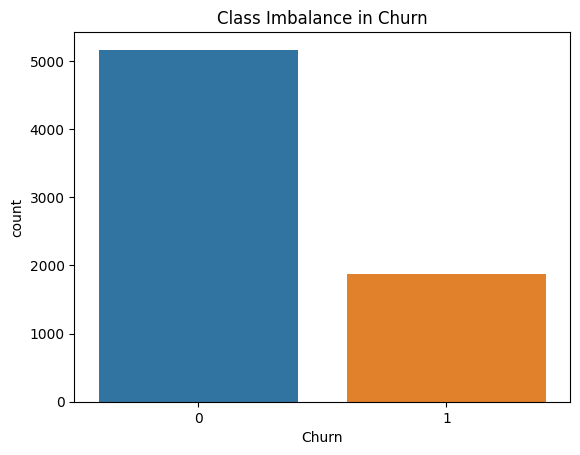

In [15]:
# ---------------------- Day 7: Class Imbalance ----------------------
imbalance_fig, ax = plt.subplots()
sns.countplot(x='Churn', data=df, ax=ax)
ax.set_title('Class Imbalance in Churn')



In [16]:
# ---------------------- Day 8-9: Encoding ----------------------
# Label Encoding binary columns
label_enc_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dtype == 'object']
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])



In [17]:
# One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)



In [18]:
# ---------------------- Day 10-11: Feature Scaling ----------------------
scaler_std = StandardScaler()
scaler_minmax = MinMaxScaler()

X_scaled_std = scaler_std.fit_transform(df.drop('Churn', axis=1))
X_scaled_minmax = scaler_minmax.fit_transform(df.drop('Churn', axis=1))



Text(0.5, 1.0, 'Correlation Heatmap')

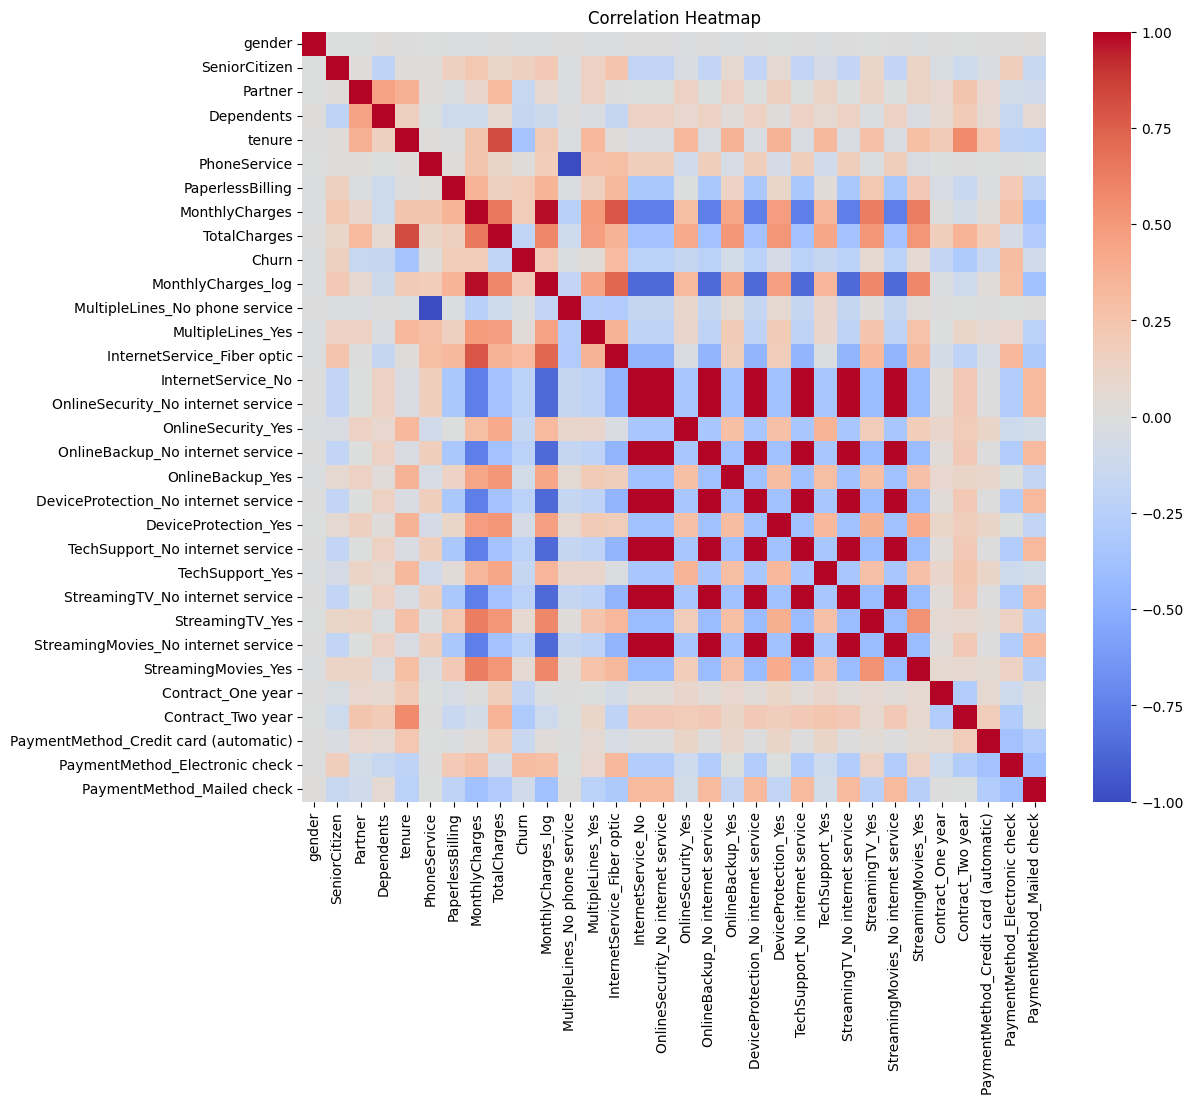

In [19]:
# ---------------------- Day 12: Correlation Heatmap ----------------------
corr_fig, ax = plt.subplots(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Heatmap')



In [20]:
# ---------------------- Day 13: SelectKBest ----------------------
X = df.drop('Churn', axis=1)
y = df['Churn']
selector = SelectKBest(chi2, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]



Text(0.5, 1.0, 'Decision Tree')

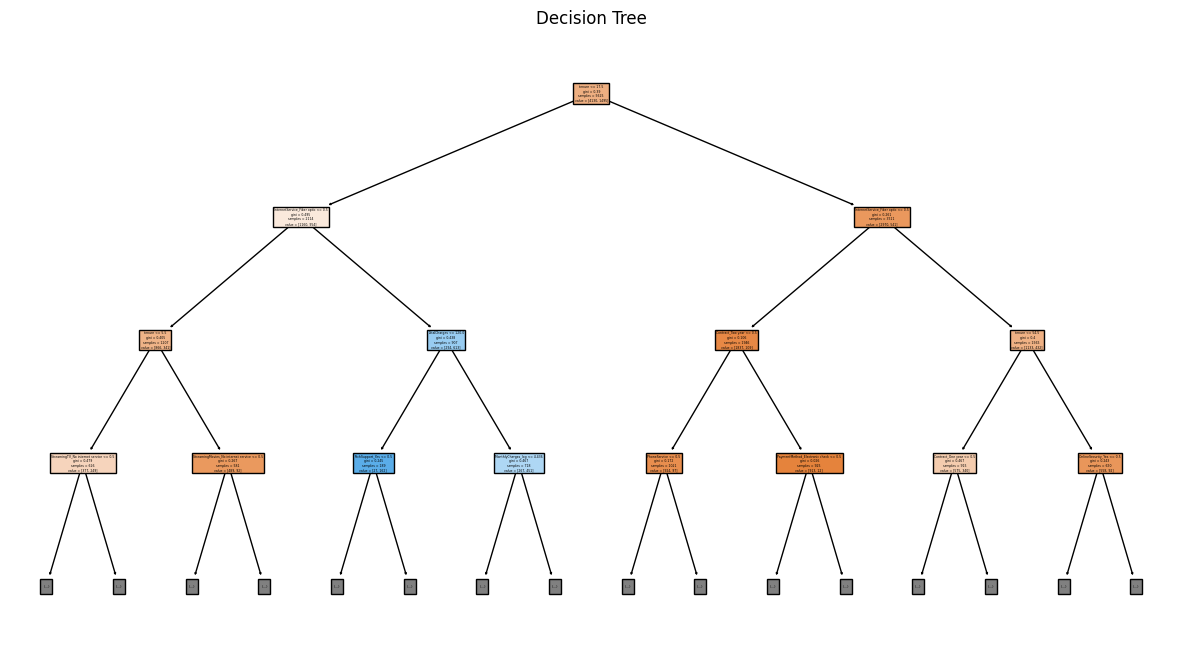

In [21]:
# ---------------------- Day 14: Decision Tree ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

tree_fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(dt_model, filled=True, ax=ax, feature_names=X.columns, max_depth=3)
ax.set_title('Decision Tree')



In [22]:
# ---------------------- Day 15: KNN ----------------------
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)



(<Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x400 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 1200x1000 with 2 Axes>,
 <Figure size 1500x800 with 1 Axes>,
 <Figure size 640x480 with 2 Axes>)

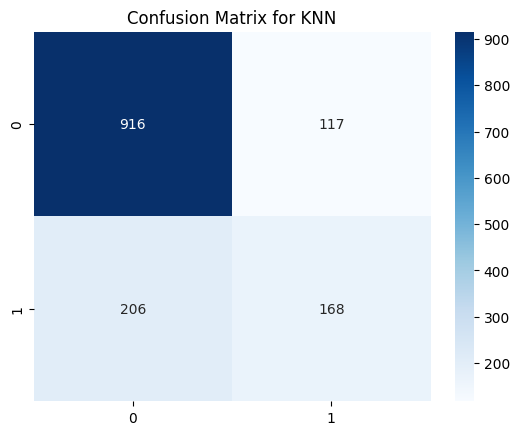

In [23]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
cm_fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix for KNN')



In [24]:

exploration_fig, missing_fig, iqr_fig, zscore_fig, before_skew_fig, after_skew_fig, imbalance_fig, corr_fig, tree_fig, cm_fig